<a href="https://colab.research.google.com/github/yarromir/salary-prediction/blob/main/salary_prognosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from prophet import Prophet

In [ ]:
url = "https://raw.githubusercontent.com/yarromir/salary-prediction/main/zp.csv"

In [ ]:
df = pd.read_csv(url)

In [ ]:
df = df.rename({'date': 'ds', 'salary': 'y'}, axis=1)

In [ ]:
df

,ds,y,currency,usdsalary
0,9/1/2021,1284,2.52,510
1,10/1/2021,2049,2.52,813
2,11/1/2021,2789,2.52,1107
3,12/1/2021,5322,2.55,2087
4,1/1/2022,1312,2.58,509
5,2/1/2022,1934,2.58,750
6,3/1/2022,1629,3.45,472
7,4/1/2022,4662,2.93,1591
8,5/1/2022,2829,2.61,1084
9,6/1/2022,3232,2.61,1238


In [ ]:
df_salary = df[['ds', 'y']]

train, test = train_test_split(df_salary, test_size=0.1, random_state=42, shuffle=False)

In [ ]:
model = Prophet()
model.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7p7nxl53/6jist9i7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7p7nxl53/iou1j2l1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17373', 'data', 'file=/tmp/tmp7p7nxl53/6jist9i7.json', 'init=/tmp/tmp7p7nxl53/iou1j2l1.json', 'output', 'file=/tmp/tmp7p7nxl53/prophet_model5rm5mwqm/prophet_model-20240101230213.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:02:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:02:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:

<function matplotlib.pyplot.show(close=None, block=None)>

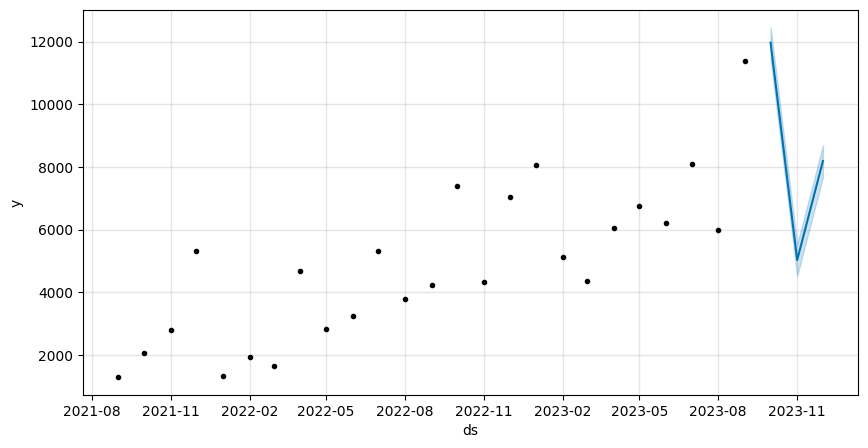

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

predict = model.predict(test)
fig = model.plot(predict, ax=ax)
plt.show

In [ ]:
from pandas import DataFrame
from pandas import to_datetime
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot


future = list()
for i in range(1, 13):
 date = '2023-%02d' % i
 future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])

In [ ]:
forecast = model.predict(future)


In [ ]:
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 1059.343


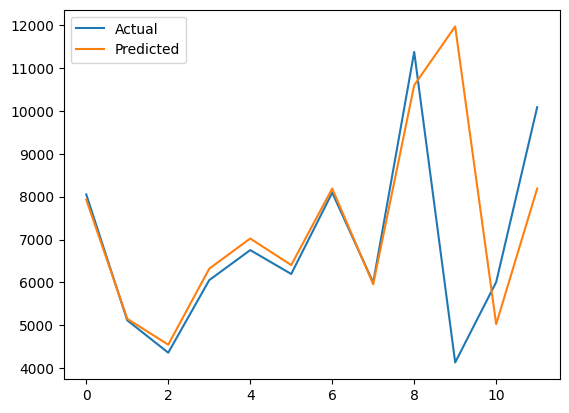

In [ ]:
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [ ]:
model_full = Prophet()
model_full.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 21.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7p7nxl53/0sq15ady.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7p7nxl53/avke4znm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43737', 'data', 'file=/tmp/tmp7p7nxl53/0sq15ady.json', 'init=/tmp/tmp7p7nxl53/avke4znm.json', 'output', 'file=/tmp/tmp7p7nxl53/prophet_modelcvt9edis/prophet_model-20240101230604.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:06:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:06:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:

In [ ]:
future = model_full.make_future_dataframe(periods=12, freq='M')
forecast = model_full.predict(future)

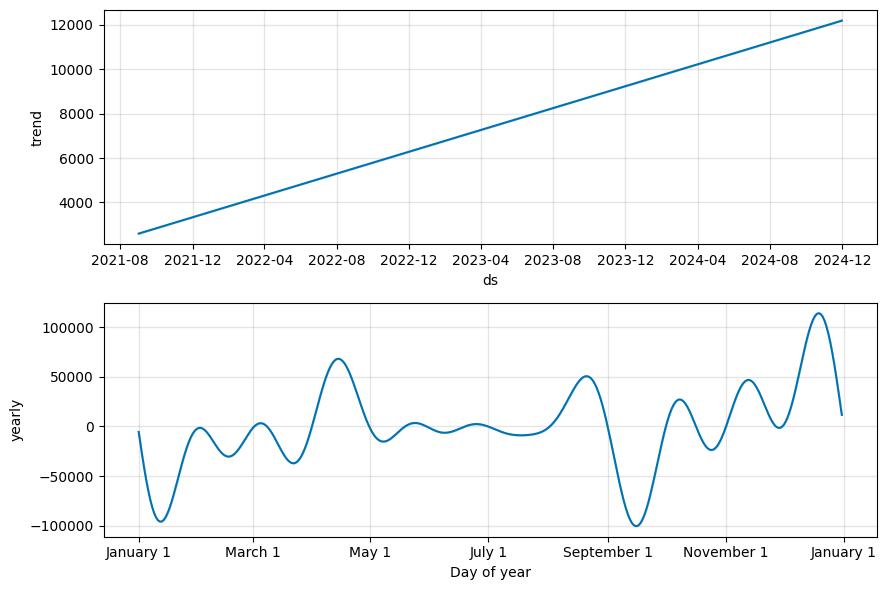

In [ ]:
fig = model_full.plot_components(forecast)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-09-01,2599.663086,-466.104110,1454.600293,2599.663086,2599.663086,-2111.961262,-2111.961262,-2111.961262,-2111.961262,-2111.961262,-2111.961262,0.0,0.0,0.0,487.701824
1,2021-10-01,2842.059257,2432.592087,4389.293411,2842.059257,2842.059257,574.405547,574.405547,574.405547,574.405547,574.405547,574.405547,0.0,0.0,0.0,3416.464804
2,2021-11-01,3092.535300,1831.141080,3727.150209,3092.535300,3092.535300,-316.820703,-316.820703,-316.820703,-316.820703,-316.820703,-316.820703,0.0,0.0,0.0,2775.714597
3,2021-12-01,3334.931471,4175.804437,6098.682768,3334.931471,3334.931471,1831.486242,1831.486242,1831.486242,1831.486242,1831.486242,1831.486242,0.0,0.0,0.0,5166.417713
4,2022-01-01,3585.407514,590.210660,2495.729881,3585.407514,3585.407514,-2084.921106,-2084.921106,-2084.921106,-2084.921106,-2084.921106,-2084.921106,0.0,0.0,0.0,1500.486408
5,2022-02-01,3835.883558,1150.336760,3082.597089,3835.883558,3835.883558,-1674.604312,-1674.604312,-1674.604312,-1674.604312,-1674.604312,-1674.604312,0.0,0.0,0.0,2161.279246
6,2022-03-01,4062.119984,859.525878,2745.141125,4062.119984,4062.119984,-2239.114938,-2239.114938,-2239.114938,-2239.114938,-2239.114938,-2239.114938,0.0,0.0,0.0,1823.005046
7,2022-04-01,4312.596028,3803.021531,5740.028671,4312.596028,4312.596028,428.641268,428.641268,428.641268,428.641268,428.641268,428.641268,0.0,0.0,0.0,4741.237296
8,2022-05-01,4554.992199,1838.880702,3740.263280,4554.992199,4554.992199,-1740.943597,-1740.943597,-1740.943597,-1740.943597,-1740.943597,-1740.943597,0.0,0.0,0.0,2814.048602
9,2022-06-01,4805.468242,2151.696441,4144.292651,4805.468242,4805.468242,-1691.292305,-1691.292305,-1691.292305,-1691.292305,-1691.292305,-1691.292305,0.0,0.0,0.0,3114.175937


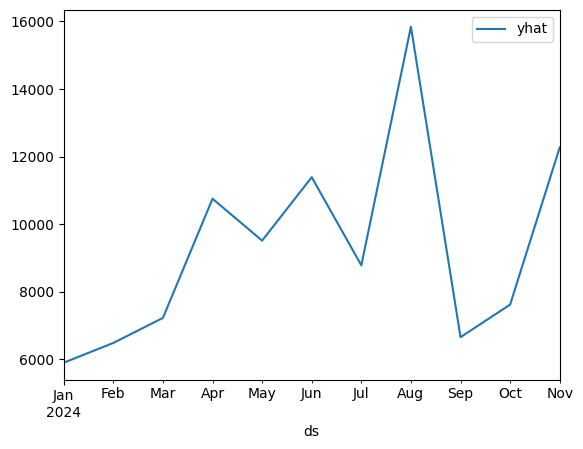

In [ ]:
plot_fc_df = forecast[29:]
plot = plot_fc_df.plot(x="ds", y='yhat')

In [ ]:
clean = forecast[29:]

In [ ]:
clean=clean[["ds", 'yhat']]
display(clean)

,ds,yhat
29,2024-01-31,5900.061514
30,2024-02-29,6485.212195
31,2024-03-31,7225.889730
32,2024-04-30,10752.575967
33,2024-05-31,9512.742614
34,2024-06-30,11390.005607
35,2024-07-31,8782.086275
36,2024-08-31,15841.979282
37,2024-09-30,6656.093449
38,2024-10-31,7620.062311


from matplotlib import pyplot as plt
clean['yhat'].plot(kind='hist', bins=20, title='yhat')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['yhat']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = clean.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('yhat')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ds']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ds'}, axis=1)
              .sort_values('ds', ascending=True))
  xs = counted['ds']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = clean.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
clean['yhat'].plot(kind='line', figsize=(8, 4), title='yhat')
plt.gca().spines[['top', 'right']].set_visible(False)